In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder , PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [20]:

df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\airbnb pricde prediction\train.csv")

In [21]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [27]:

df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [28]:
catcol = df.select_dtypes(include = ['bool','object']).columns

label_encoder = {}

for col in catcol:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoder[col] = le

In [29]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,6142,3,1.0,4,2,1,...,40.696524,-73.991617,10464,77,2,100.0,32398,195,1.0,1.0
1,6304928,5.129899,0,0,6269,7,1.0,4,2,1,...,40.766115,-73.989040,65672,252,6,93.0,16220,74,3.0,3.0
2,7919400,4.976734,0,0,21345,5,1.0,4,1,1,...,40.808110,-73.943756,66396,247,10,92.0,32852,84,1.0,3.0
3,13418779,6.620073,17,0,38854,4,1.0,4,0,1,...,37.772004,-122.431619,9387,325,0,NaN,33692,748,2.0,2.0
4,3808709,4.744932,0,0,55413,2,1.0,4,1,1,...,38.925627,-77.034596,32068,119,4,40.0,65883,341,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,0,1,67121,1,1.0,4,0,0,...,40.709025,-73.939405,72348,605,0,NaN,25229,203,1.0,1.0
74107,13281809,5.043425,0,0,38652,4,2.0,4,1,1,...,33.871549,-118.396053,59902,255,16,93.0,13695,515,2.0,4.0
74108,18688039,5.220356,0,0,61276,5,1.0,4,1,1,...,40.706749,-73.942377,43692,605,43,94.0,37484,203,2.0,2.0
74109,17045948,5.273000,0,0,48796,2,1.0,4,2,1,...,40.738535,-74.000157,26450,592,0,NaN,51019,61,0.0,2.0


In [11]:
cor = df.corr()

<Axes: >

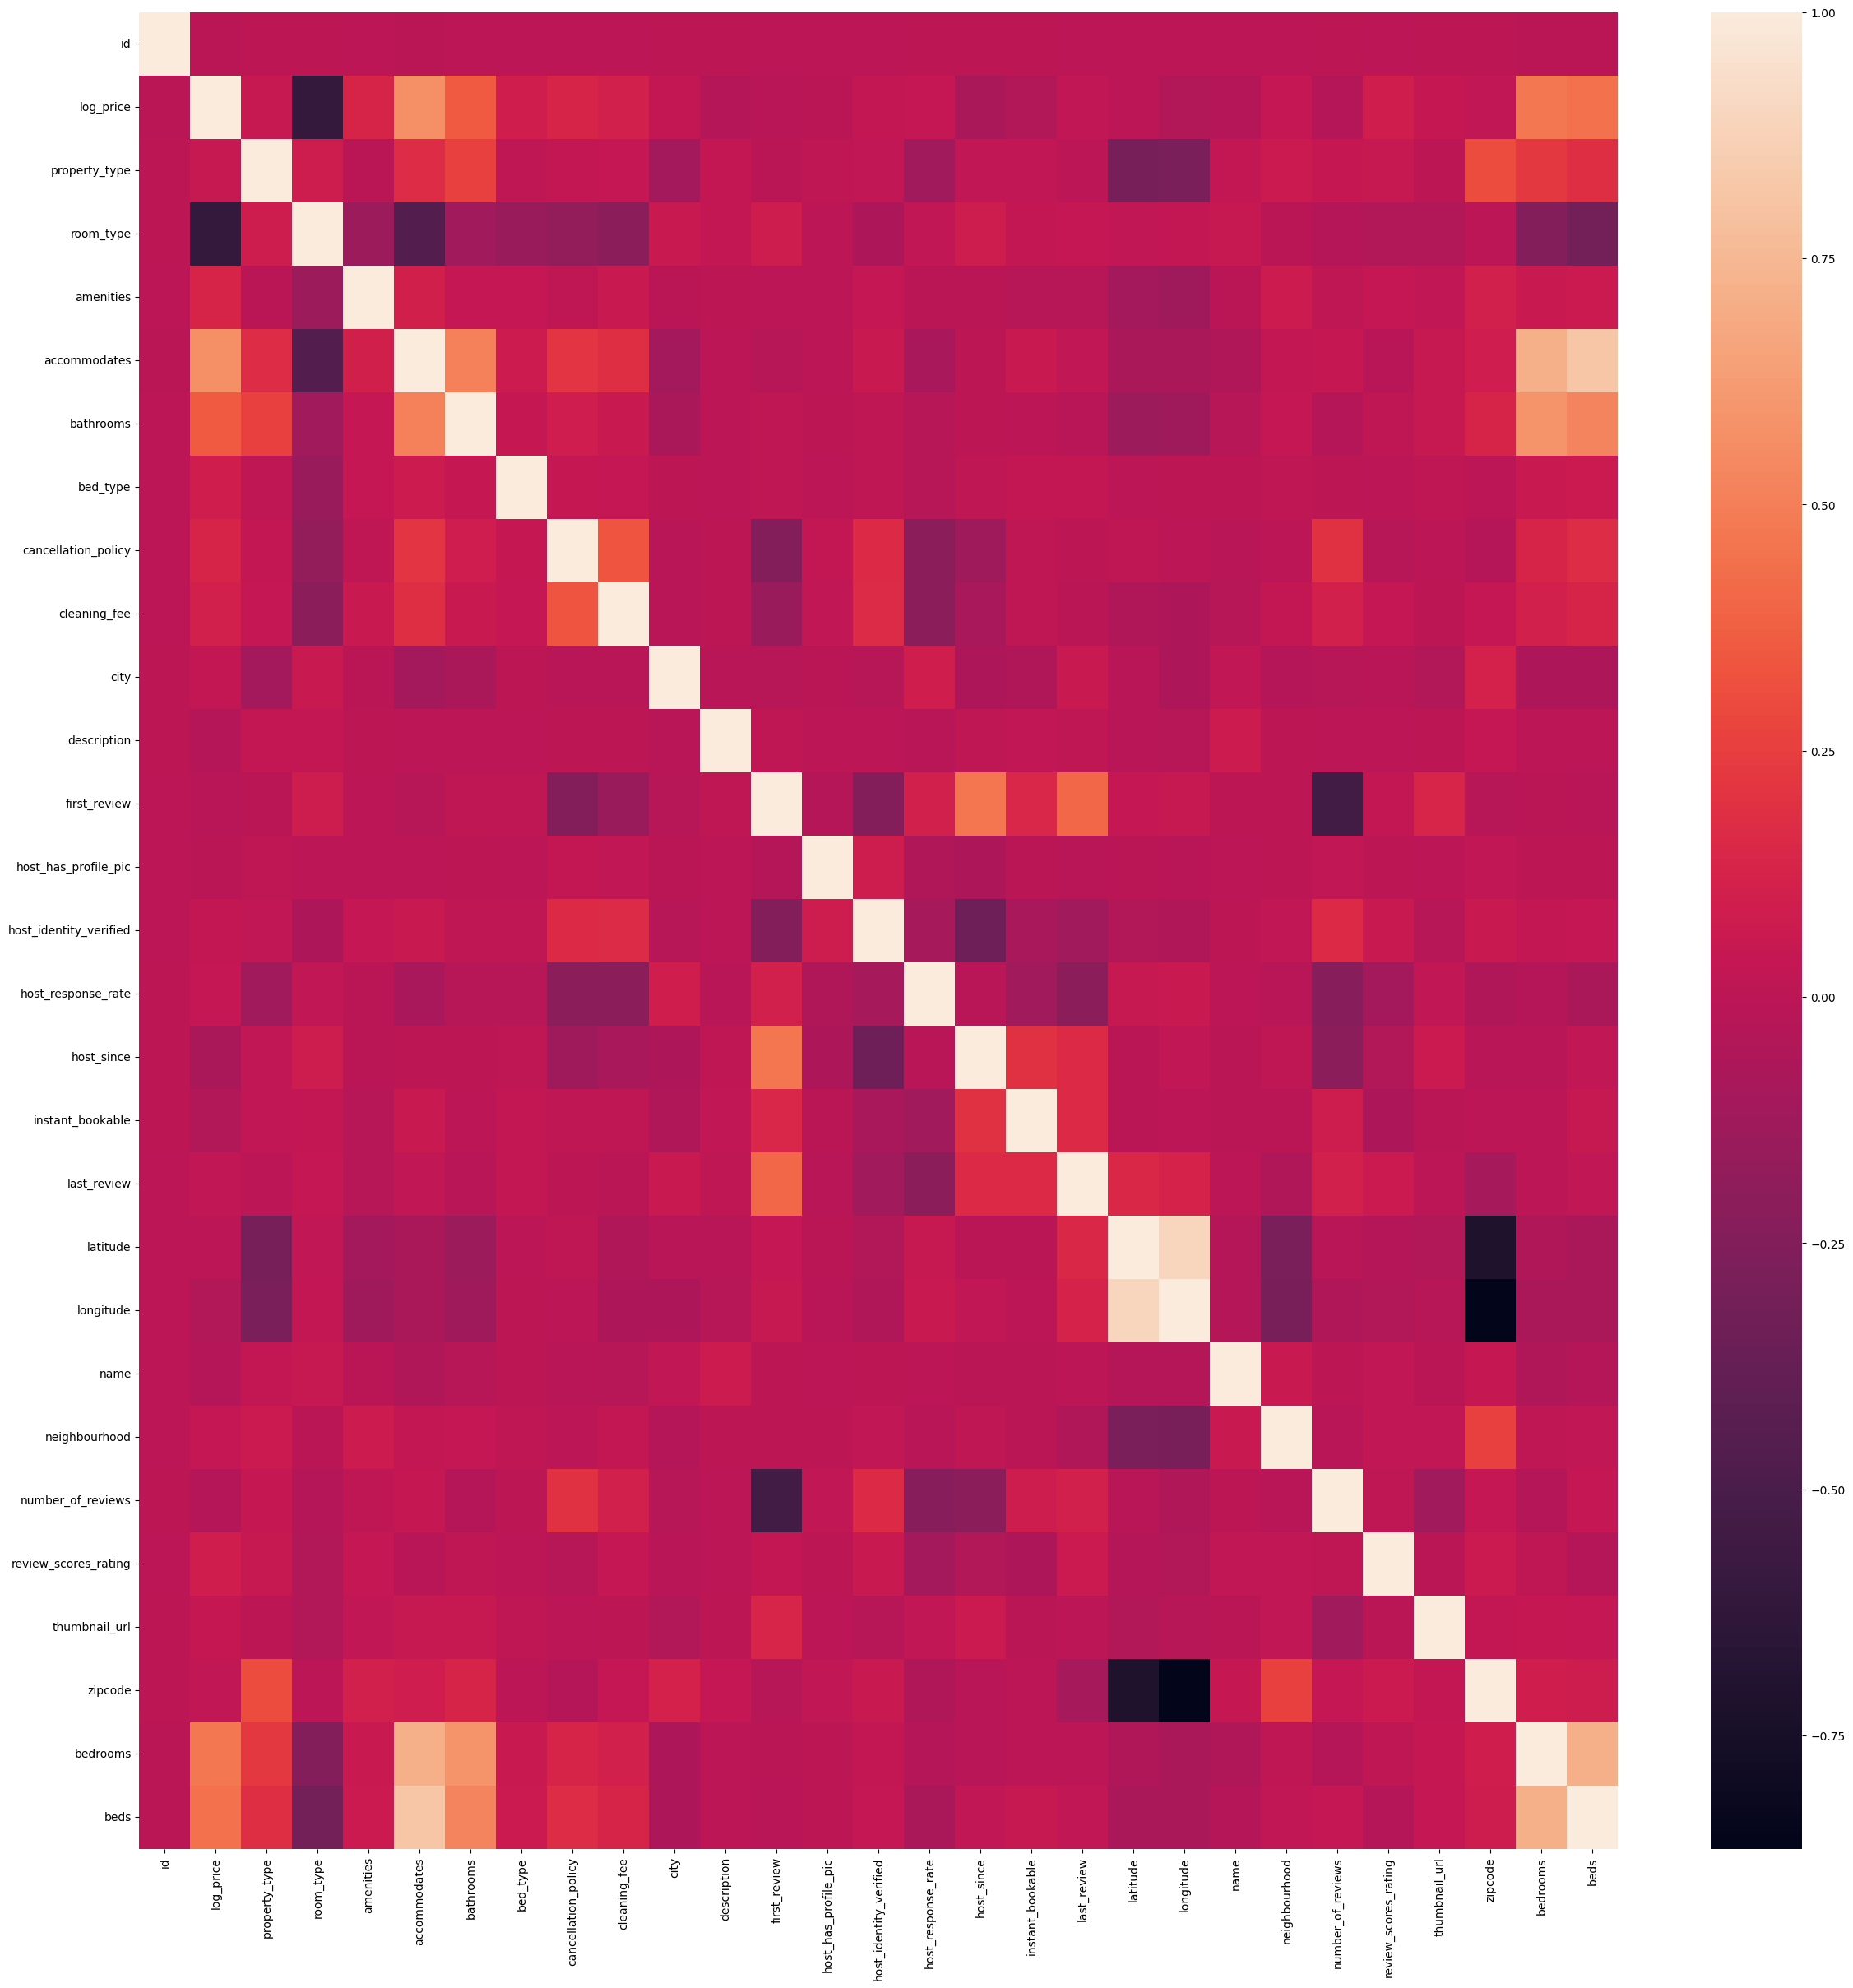

In [15]:
plt.figure(figsize=(29,29))
sns.heatmap(cor)


In [18]:
print(cor['log_price'])

id                       -0.007178
log_price                 1.000000
property_type             0.048741
room_type                -0.607125
amenities                 0.129984
accommodates              0.567574
bathrooms                 0.355420
bed_type                  0.093780
cancellation_policy       0.131869
cleaning_fee              0.111191
city                      0.030913
description              -0.027849
first_review             -0.013286
host_has_profile_pic     -0.010605
host_identity_verified    0.024205
host_response_rate        0.033320
host_since               -0.078517
instant_bookable         -0.044271
last_review               0.020271
latitude                 -0.002193
longitude                -0.047529
name                     -0.032571
neighbourhood             0.035344
number_of_reviews        -0.032470
review_scores_rating      0.091219
thumbnail_url             0.040068
zipcode                   0.020510
bedrooms                  0.473212
beds                

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  int64  
 3   room_type               74111 non-null  int64  
 4   amenities               74111 non-null  int64  
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  int64  
 8   cancellation_policy     74111 non-null  int64  
 9   cleaning_fee            74111 non-null  int64  
 10  city                    74111 non-null  int64  
 11  description             74111 non-null  int64  
 12  first_review            74111 non-null  int64  
 13  host_has_profile_pic    74111 non-null  int64  
 14  host_identity_verified  74111 non-null

In [30]:
df = df.fillna(df.median(numeric_only=True))


In [31]:
df['beds_and_baths'] = df['bedrooms'] + df['bathrooms']
df.drop(columns=['room_type','bedrooms','bathrooms','beds','bed_type'],axis=1,inplace=True)

In [33]:
pt = PowerTransformer(method='yeo-johnson')

<Axes: >

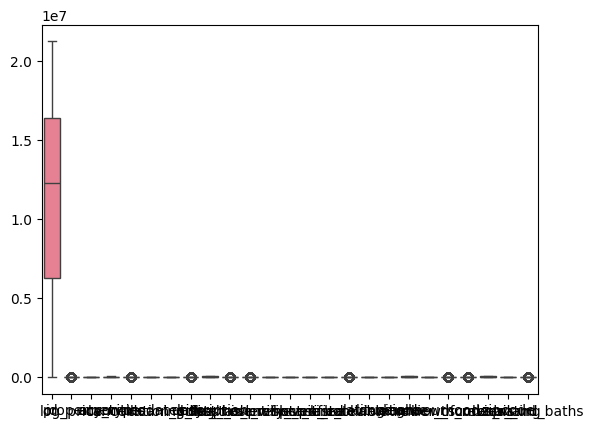

In [36]:
sns.boxplot(data=df)

In [38]:
cols = (df.drop(columns=['log_price'],axis=1)).columns

In [42]:
for col in cols:
    df[col]=pt.fit_transform(df[[col]])

<Axes: >

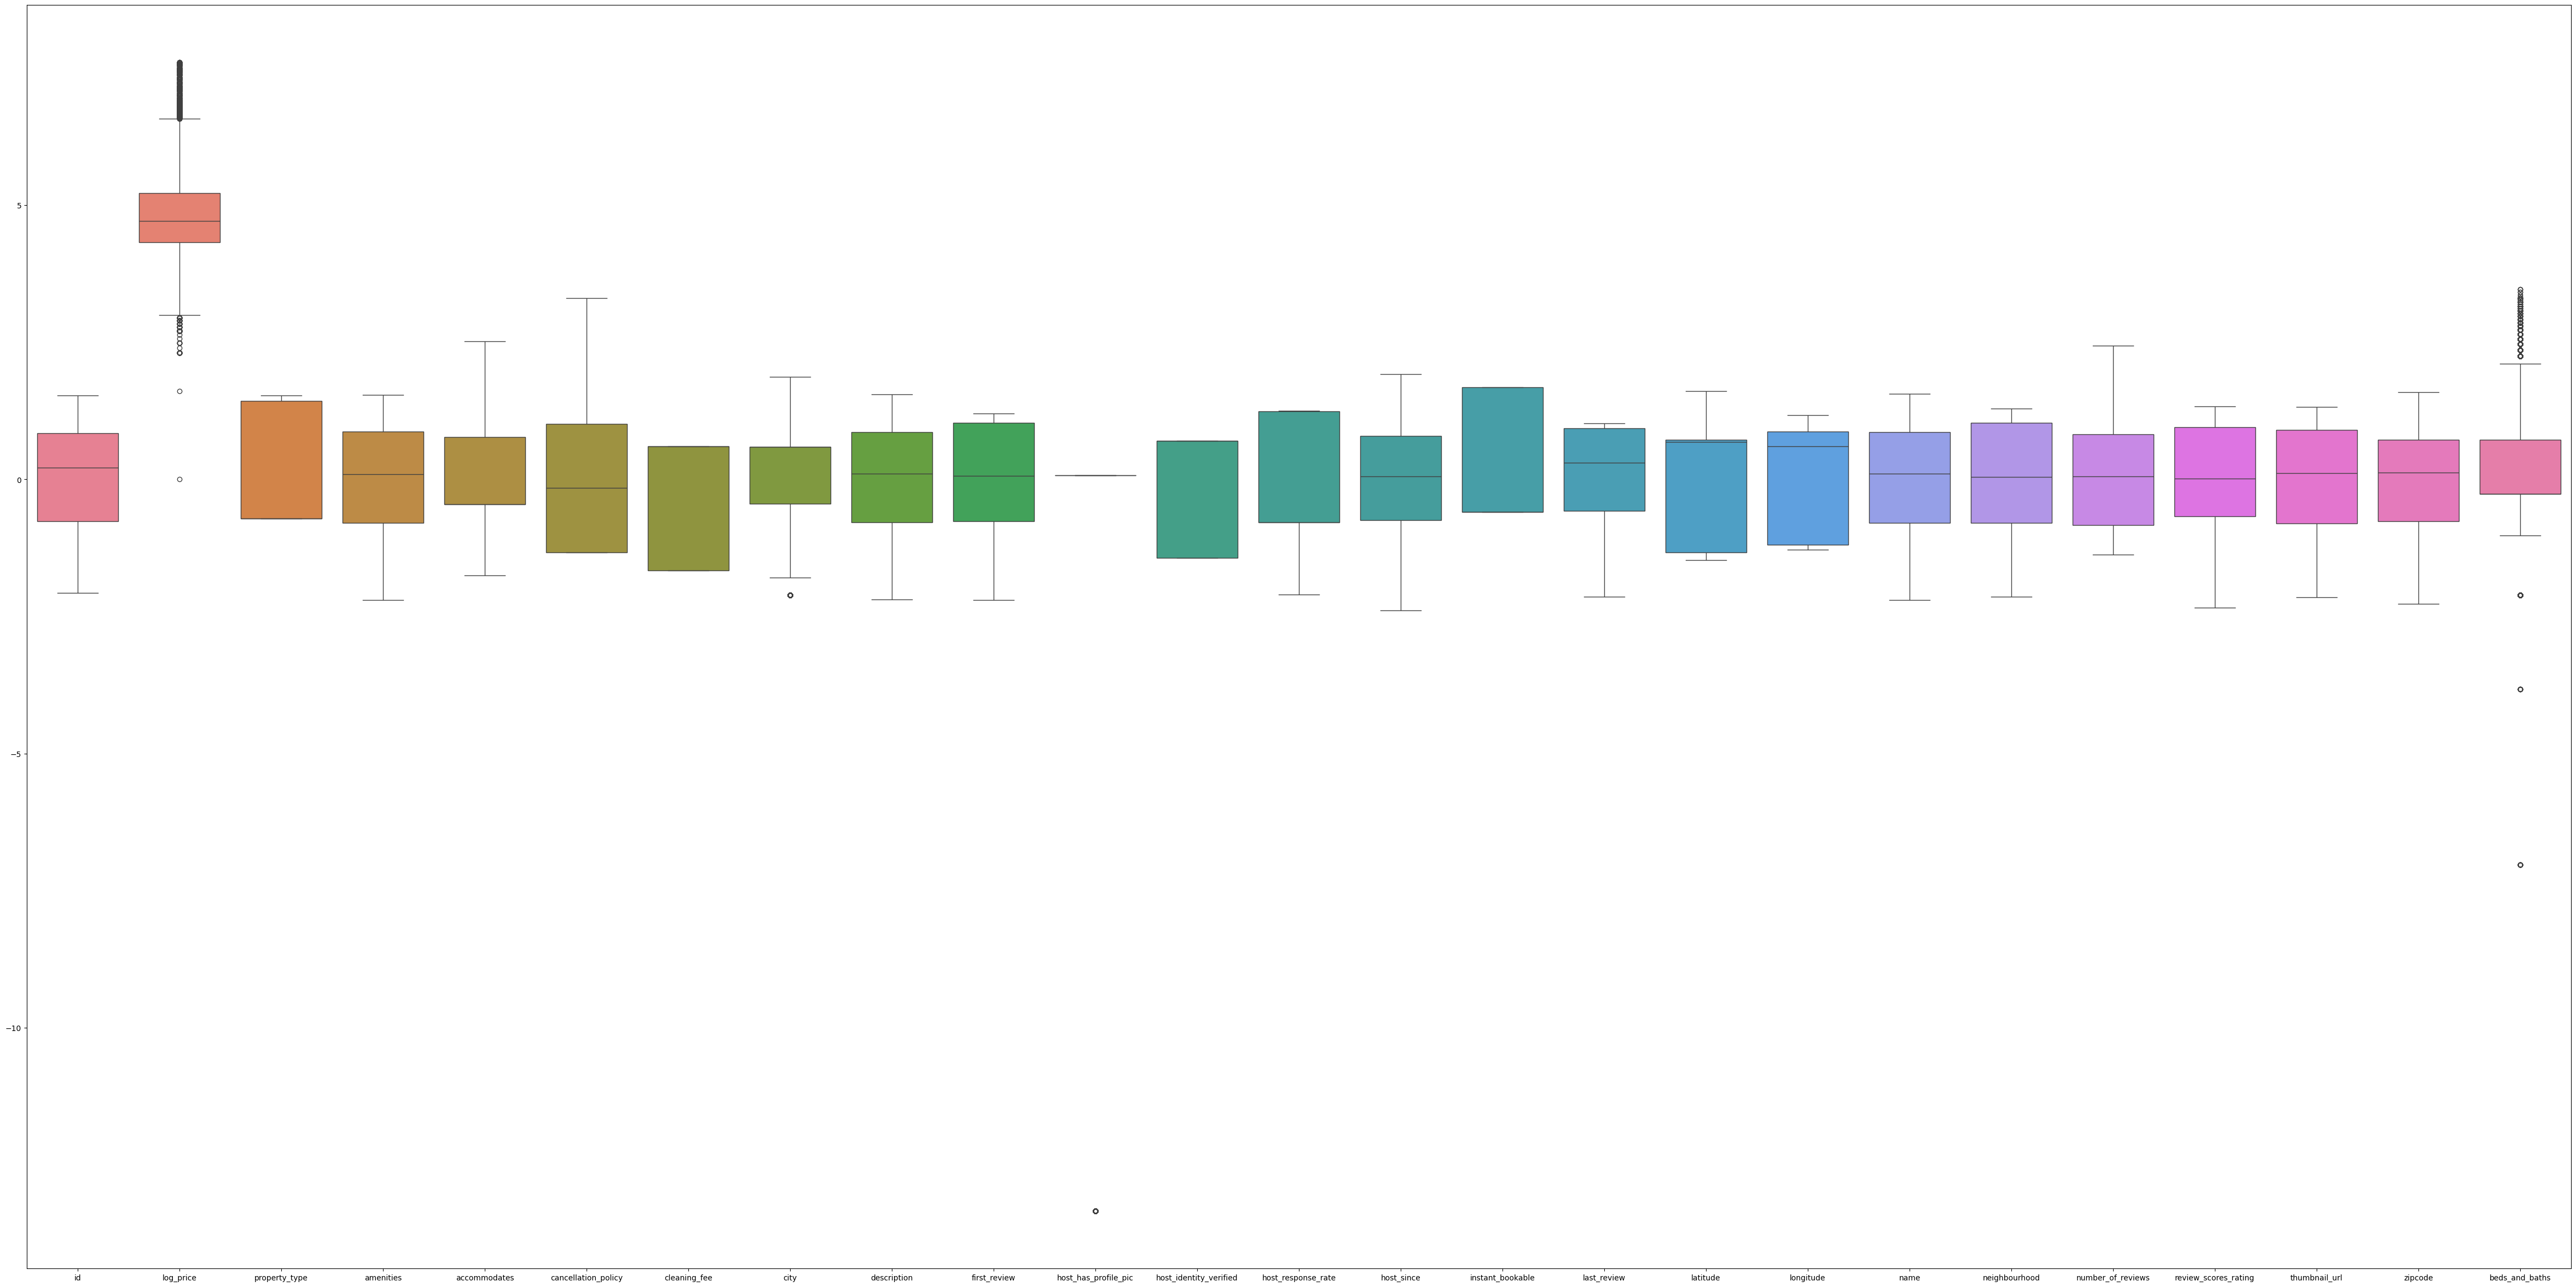

In [48]:
plt.figure(figsize=(60,30))
sns.boxplot(data = df)

In [49]:
df.dropna(subset=['beds_and_baths'],inplace=True)
df['beds_and_baths'].isnull().sum()

np.int64(0)

In [50]:
df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())),inplace=True)
df.isnull().sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23316\3282121725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())),inplace=True)


id                        0
log_price                 0
property_type             0
amenities                 0
accommodates              0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
beds_and_baths            0
dtype: int64

In [51]:
df.drop(columns=['zipcode','latitude','longitude','thumbnail_url','last_review','id','description','first_review','host_has_profile_pic','host_identity_verified','host_since'],axis=1,inplace=True)
df

,log_price,property_type,amenities,accommodates,cancellation_policy,cleaning_fee,city,host_response_rate,instant_bookable,name,neighbourhood,number_of_reviews,review_scores_rating,beds_and_baths
0,5.010635,-0.711968,-1.514216,0.285108,1.008626,0.601880,0.587444,1.247421,-0.596535,-1.253212,-1.391263,-0.532885,1.332412,-0.267490
1,5.129899,-0.711968,-1.504183,1.604489,1.008626,0.601880,0.587444,-0.786210,1.676347,1.271605,-0.353183,0.054830,-0.671857,1.351387
2,4.976734,-0.711968,-0.540758,1.125288,-0.152750,0.601880,0.587444,-0.786210,1.676347,1.298645,-0.379048,0.348117,-0.856760,-0.267490
3,6.620073,1.423990,0.337084,0.773736,-1.332410,0.601880,1.867777,1.247421,-0.596535,-1.323190,0.009564,-1.374862,0.015716,0.724072
4,4.744932,-0.711968,1.063026,-0.454479,-0.152750,0.601880,-1.236718,-0.786210,1.676347,-0.109486,-1.107526,-0.172479,-2.338847,-2.111979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,-0.711968,1.537877,-1.751193,-1.332410,-1.661461,0.587444,1.247421,-0.596535,1.517792,1.230400,-1.374862,0.015716,-0.267490
74107,5.043425,-0.711968,0.327727,0.773736,-0.152750,0.601880,-0.446157,-0.786210,-0.596535,1.052875,-0.337734,0.618051,-0.671857,1.351387
74108,5.220356,-0.711968,1.304128,1.125288,-0.152750,0.601880,0.587444,-0.786210,1.676347,0.401936,1.230400,1.167539,-0.466220,0.724072
74109,5.273000,-0.711968,0.781772,-0.454479,1.008626,0.601880,0.587444,-0.786210,1.676347,-0.375784,1.177937,-1.374862,0.015716,-2.111979


In [52]:
df['price_per_room'] = df['log_price']/df['beds_and_baths']

In [56]:
features = df.drop(columns=['log_price'],axis=1)
labels = df['log_price']


In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,random_state=42)


In [59]:
xg = XGBRegressor()
xg.fit(xtrain,ytrain)
pred = xg.predict(xtest)
print(xg.score(xtest,ytest))

0.9893664988999705


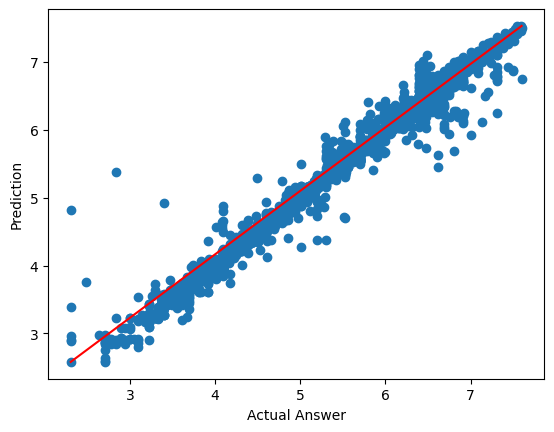

In [60]:
plt.scatter(ytest, pred)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot([min(ytest),max(ytest)],[min(pred),max(pred)],color='red')